In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/CustomerConversion.csv")
data.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no

# New section

In [ ]:
# Supervised Learning and , Binary classfication Problem

In [ ]:
# Data Cleaning

data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
data.shape

(45211, 11)

In [ ]:
data = data.drop_duplicates()
data.shape

(45205, 11)

In [ ]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
data['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [ ]:
data['y_new'] = data['y'].map({'yes' : 1 , 'no' : 0})
data.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome   y  y_new  
0          1      unknown  no      0  
1          1      unknown  no      0  
2          1      unknown  no      0  
3          1      unknown  no      0  
4          1      unknown  no      0

In [ ]:
# Age
data.age.unique()


array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
data.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(data, x= 'age', y = 'y_new',title = 'Distribution of age')
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
data.loc[(data.age == 49) & (data.y == 'yes')] #101 rows

age          job   marital education_qual call_type  day  mon   dur  \
1247    49     services   married      secondary   unknown    8  may  1119   
1340    49       admin.  divorced      secondary   unknown    8  may   513   
3314    49       admin.    single      secondary   unknown   15  may  1257   
3324    49      unknown   married        primary   unknown   15  may   520   
9774    49   management  divorced      secondary   unknown    9  jun  1055   
...    ...          ...       ...            ...       ...  ...  ...   ...   
44673   49       admin.    single       tertiary  cellular    3  sep   252   
44795   49   management   married       tertiary  cellular   15  sep   316   
44809   49   technician   married       tertiary  cellular   16  sep   225   
44887   49   management   married       tertiary  cellular   24  sep   249   
45052   49  blue-collar   married      secondary  cellular   19  oct   192   

       num_calls prev_outcome    y  y_new  
1247           1      unknown  yes      1  
1340           1      unknown  yes      1  
3314           3      unknown  yes      1  
3324           2      unknown  yes      1  
9774          10      unknown  yes      1  
...          ...          ...  ...    ...  
44673          2      success  yes      1  
44795          1      success  yes      1  
44809          1      success  yes      1  
44887          1      success  yes      1  
45052          1      success  yes      1  

[101 rows x 12 columns]

In [ ]:

Q3 = data.age.quantile(0.75)
Q1 = data.age.quantile(0.25)
IQR = Q3 - Q1
Upper_threshold = Q3 + (1.5 * IQR)
Lower_threshold = Q1 - (1.5 * IQR)
Lower_threshold, Upper_threshold

(10.5, 70.5)

In [ ]:
data.age = data.age.clip(10, 71)

In [ ]:

data.age.describe()

count    45205.000000
mean        40.874439
std         10.410718
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         71.000000
Name: age, dtype: float64

In [ ]:
# Binning - Convert numerical featured to categorical using bins
bins = range(18,71,5) #[18,23,28,33,38,43,48,53,58,63,66,73]
labels = [0,1,2,3,4,5,6,7,8,9]
data['age_bin'] = pd.cut(data['age'],bins = bins , labels = labels, include_lowest = True)
data.head(1)

age         job  marital education_qual call_type  day  mon  dur  \
0   58  management  married       tertiary   unknown    5  may  261   

   num_calls prev_outcome   y  y_new age_bin  
0          1      unknown  no      0       7

In [ ]:
data.age_bin.isnull().sum()

598

In [ ]:
#Call Type
data.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
data.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
data.groupby('call_type')['y_new'].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: y_new, dtype: float64

In [ ]:
import plotly.express as px
call_type = data.groupby('call_type')['y_new'].mean().sort_values(ascending = False)
fig = px.bar(call_type, title = 'Call_type vs target')
fig.show()

In [ ]:
fig = px.sunburst(data, path = ['call_type','y'])
fig.show()

In [ ]:
#Job
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
data.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.pie(data,names = 'job')
fig.update_traces(textposition = 'outside')
fig.show()

In [ ]:
data.loc[data.job == 'unknown','job'] = 'blue-collar'
data.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:

data.loc[data.job == 'student']  # 938 rows
#data.loc[(data.job == 'student') & (data.y == 'yes')] # 269 rows -> 269/938 = 28%
#data.loc[(data.job == 'student') & (data.y == 'no')] # 669 rows -> 669/938 = 72%

age      job marital education_qual  call_type  day  mon  dur  \
151     26  student  single      secondary    unknown    5  may  610   
203     35  student  single        unknown    unknown    5  may  611   
265     30  student  single       tertiary    unknown    5  may   89   
292     24  student  single      secondary    unknown    5  may  226   
297     24  student  single      secondary    unknown    5  may  204   
...    ...      ...     ...            ...        ...  ...  ...  ...   
45148   22  student  single      secondary   cellular    8  nov  449   
45158   34  student  single        unknown   cellular    9  nov  600   
45170   19  student  single        primary  telephone   10  nov   98   
45196   25  student  single      secondary   cellular   16  nov  330   
45203   23  student  single       tertiary   cellular   17  nov  266   

       num_calls prev_outcome    y  y_new age_bin  
151            2      unknown   no      0       1  
203            2      unknown   no      0       3  
265            2      unknown   no      0       2  
292            3      unknown   no      0       1  
297            2      unknown   no      0       1  
...          ...          ...  ...    ...     ...  
45148          2        other  yes      1       0  
45158          2      failure   no      0       3  
45170          2        other   no      0       0  
45196          1      unknown  yes      1       1  
45203          1      unknown  yes      1       0  

[938 rows x 13 columns]

In [ ]:

#data.loc[data.job == 'blue-collar']  # 10018 rows
#data.loc[(data.job == 'blue-collar') & (data.y == 'yes')] # 742 rows -> 0.07%
data.loc[(data.job == 'blue-collar') & (data.y == 'no')] # 9276 rows -> 92%

age          job  marital education_qual  call_type  day  mon   dur  \
3       47  blue-collar  married        unknown    unknown    5  may    92   
4       33  blue-collar   single        unknown    unknown    5  may   198   
17      57  blue-collar  married        primary    unknown    5  may    38   
20      28  blue-collar  married      secondary    unknown    5  may   262   
22      32  blue-collar   single        primary    unknown    5  may   160   
...    ...          ...      ...            ...        ...  ...  ...   ...   
45141   71  blue-collar  married        unknown  telephone    8  nov   207   
45181   46  blue-collar  married      secondary   cellular   15  nov    74   
45186   59  blue-collar  married        unknown   cellular   16  nov   280   
45199   34  blue-collar   single      secondary   cellular   16  nov  1166   
45209   57  blue-collar  married      secondary  telephone   17  nov   508   

       num_calls prev_outcome   y  y_new age_bin  
3              1      unknown  no      0       5  
4              1      unknown  no      0       2  
17             1      unknown  no      0       7  
20             1      unknown  no      0       1  
22             1      unknown  no      0       2  
...          ...          ...  ..    ...     ...  
45141          1      success  no      0     NaN  
45181          2      failure  no      0       5  
45186          1      failure  no      0       8  
45199          3        other  no      0       3  
45209          4      unknown  no      0       7  

[9276 rows x 13 columns]

In [ ]:
fig = px.bar(data.groupby('job')['y_new'].mean().sort_values(ascending = False))
fig.show()


In [ ]:
#Marital
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
data.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
fig = px.pie(data, names = 'marital', hole = 0.5)
fig.show()

In [ ]:

#(data.loc[(data.marital == 'married') & (data.y == 'yes')]) # 2755 / 27210 =0.10
data.loc[(data.marital == 'single') & (data.y == 'yes')] # 1912 / 12778 =0.14

age         job marital education_qual call_type  day  mon   dur  \
270     42  management  single       tertiary   unknown    5  may   562   
446     39  technician  single        unknown   unknown    6  may  1623   
569     28    services  single      secondary   unknown    6  may  1297   
849     37      admin.  single      secondary   unknown    7  may   732   
897     38      admin.  single      secondary   unknown    7  may   786   
...    ...         ...     ...            ...       ...  ...  ...   ...   
45196   25     student  single      secondary  cellular   16  nov   330   
45197   36  management  single      secondary  cellular   16  nov   270   
45202   34      admin.  single      secondary  cellular   17  nov   224   
45203   23     student  single       tertiary  cellular   17  nov   266   
45205   25  technician  single      secondary  cellular   17  nov   386   

       num_calls prev_outcome    y  y_new age_bin  
270            2      unknown  yes      1       4  
446            1      unknown  yes      1       4  
569            3      unknown  yes      1       1  
849            2      unknown  yes      1       3  
897            1      unknown  yes      1       3  
...          ...          ...  ...    ...     ...  
45196          1      unknown  yes      1       1  
45197          1      unknown  yes      1       3  
45202          1      unknown  yes      1       3  
45203          1      unknown  yes      1       0  
45205          2      unknown  yes      1       1  

[1912 rows x 13 columns]

In [ ]:
fig = px.bar(data.groupby('marital')['y_new'].mean().sort_values(ascending = False))
fig.show()

In [ ]:
#Education Qualification
data.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
data['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
edu_qual_count = data['education_qual'].value_counts()
edu_qual_values = [i for i in edu_qual_count]
qual_list = ['secondary', 'tertiary', 'primary' , 'unknown']
edu_qual = pd.DataFrame(qual_list,columns =['qualification'])
edu_qual['count'] = edu_qual_values
edu_qual


qualification  count
0     secondary  23199
1      tertiary  13299
2       primary   6850
3       unknown   1857

In [ ]:
fig =px.sunburst(data, path = ['education_qual','y'])
fig.show()

In [ ]:

data.loc[data.education_qual == 'unknown','education_qual']='secondary'
data.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [ ]:

fig = px.bar(data.groupby('education_qual')['y_new'].mean().sort_values(ascending = False))
fig.show()

In [ ]:
#Month
data['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
# import datetime
# data["mon_edit"] = pd.to_datetime(data["mon"], format='%b').dt.month
# data_sorted = data.sort_values(by='mon_edit')

In [ ]:

import plotly.graph_objects as go
fig = go.Figure(go.Pie(labels = data['mon'],pull = [0.5,0,0,0,0,0,0,0,0,0,0,0]))
fig.update_traces(textposition = 'outside')
fig.show()

In [ ]:
data.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
import plotly.express as px
#fig = px.histogram(data,x = 'mon')
fig = px.bar(data.mon.value_counts().sort_values(ascending = False))
fig.show()

In [ ]:

fig = px.sunburst(data, path = ['mon','y'])
fig.show()

In [ ]:
#Day
data['day'].unique()


array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
#fig = px.scatter_3d(data, x = 'num_calls' , y = 'age' , z= 'mon', color = 'y')
fig = px.scatter_3d(data, x = 'num_calls' , y = 'age' , z= 'y',color = 'y')
fig.show()

In [ ]:
#Duration
data.dur.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [ ]:
data.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

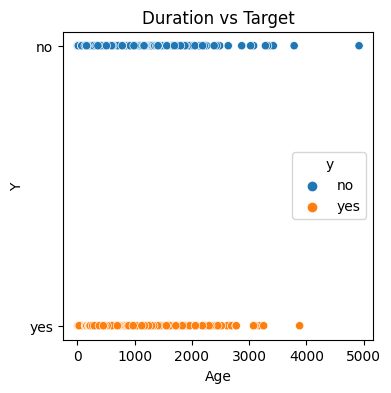

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (4,4))
sns.scatterplot(x = 'dur' , y = 'y' , hue = 'y' , data = data)
plt.title('Duration vs Target')
plt.xlabel('Age')
plt.ylabel('Y')
ax = plt.gca()

In [ ]:

fig = px.scatter(data, x = 'dur' , y = 'y' , color = 'y')
fig.show()

In [ ]:

Q3 = data.dur.quantile(0.75)
Q1 = data.dur.quantile(0.25)
IQR = Q3 - Q1
Upper_threshold = Q3 + ( 1.5 * IQR)
Lower_threshold = Q1 - ( 1.5 * IQR)
Lower_threshold , Upper_threshold

(-221.0, 643.0)

In [ ]:

data.loc[data.dur > 1200]

age         job  marital education_qual call_type  day  mon   dur  \
37      53  technician  married      secondary   unknown    5  may  1666   
43      54     retired  married      secondary   unknown    5  may  1492   
59      46    services  married        primary   unknown    5  may  1778   
86      56      admin.  married      secondary   unknown    5  may  1467   
87      41  technician  married      secondary   unknown    5  may  1389   
...    ...         ...      ...            ...       ...  ...  ...   ...   
44824   28      admin.   single      secondary  cellular   16  sep  1334   
44898   24  management   single       tertiary  cellular   27  sep  1298   
44941   34  management   single       tertiary  cellular    6  oct  1246   
45016   40  management  married       tertiary  cellular   14  oct  1410   
45200   38  technician  married      secondary  cellular   16  nov  1556   

       num_calls prev_outcome    y  y_new age_bin  
37             1      unknown   no      0       6  
43             1      unknown   no      0       7  
59             1      unknown   no      0       5  
86             1      unknown  yes      1       7  
87             1      unknown  yes      1       4  
...          ...          ...  ...    ...     ...  
44824          2      unknown  yes      1       1  
44898          1      unknown  yes      1       1  
44941          2      unknown  yes      1       3  
45016          3      unknown   no      0       4  
45200          4      unknown  yes      1       3  

[560 rows x 13 columns]

In [ ]:
data.dur = data.dur.clip(0,1000)
data.dur.describe()

count    45205.000000
mean       250.104568
std        218.604428
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       1000.000000
Name: dur, dtype: float64

In [ ]:

fig = px.histogram(data, x = 'dur')
fig.show()

In [ ]:
#Number of Calls

data.num_calls.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

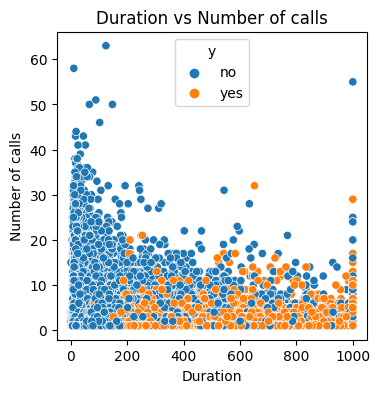

In [ ]:

plt.figure(figsize = (4,4))
sns.scatterplot(x = 'dur' , y = 'num_calls' , hue = 'y' , data = data)
plt.title('Duration vs Number of calls')
plt.xlabel('Duration')
plt.ylabel('Number of calls')
ax = plt.gca()

In [ ]:

fig = px.histogram(data, x = 'num_calls')
fig.show()

In [ ]:
fig = px.scatter(data,x = 'num_calls', y ='y',color = 'y')
fig.show()


In [ ]:
Q3 = data.num_calls.quantile(0.75)
Q1 = data.num_calls.quantile(0.25)
IQR = Q3 - Q1
upper_threshold = Q3 + (1.5 * IQR)
lower_threshold = Q1 - (1.5 * IQR)
lower_threshold, upper_threshold

(-2.0, 6.0)

In [ ]:

fig =px.sunburst(data, path =['mon','y'])
fig.show()

In [ ]:
data.loc[(data.num_calls > 14)]  # >6 ->3064 rows, >14-> 614, >12 -> 840, >10 ->1196

age            job   marital education_qual  call_type  day  mon  dur  \
2706    46         admin.  divorced       tertiary    unknown   13  may   69   
3079    28    blue-collar   married        primary    unknown   14  may   17   
3118    54    blue-collar   married      secondary    unknown   14  may  302   
3331    50   entrepreneur   married        primary    unknown   15  may  651   
3355    55    blue-collar   married        primary    unknown   15  may  176   
...    ...            ...       ...            ...        ...  ...  ...  ...   
37567   39     management   married       tertiary   cellular   14  may   11   
37792   47  self-employed   married       tertiary   cellular   14  may  199   
38580   37         admin.   married      secondary   cellular   15  may  284   
40336   57   entrepreneur   married       tertiary  telephone   18  jun  390   
44594   34     technician    single       tertiary   cellular   23  aug  220   

       num_calls prev_outcome    y  y_new age_bin  
2706          19      unknown   no      0       5  
3079          24      unknown   no      0       1  
3118          16      unknown   no      0       7  
3331          32      unknown  yes      1       6  
3355          18      unknown   no      0       7  
...          ...          ...  ...    ...     ...  
37567         15      failure   no      0       4  
37792         15      unknown   no      0       5  
38580         15      unknown   no      0       3  
40336         15      unknown   no      0       7  
44594         16        other   no      0       3  

[614 rows x 13 columns]

In [ ]:
fig = px.box(data, x = 'num_calls' , y = 'y')
fig.show()

In [ ]:
data.num_calls = data.num_calls.clip(0,10)
data.num_calls.describe()

count    45205.000000
mean         2.583453
std          2.133147
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: num_calls, dtype: float64

In [ ]:
#Previous Outcome

data.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:

data.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:

# data.loc[data.prev_outcome == 'unknown','prev_outcome'] = 'other'
# data.prev_outcome.value_counts()

In [ ]:
import plotly.express as px


In [ ]:
fig = px.pie(data, names = 'prev_outcome')
fig.show()

In [ ]:

fig =px.sunburst(data, path = ['education_qual','prev_outcome','y'])
fig.show()

In [ ]:
fig = px.bar(data.groupby('prev_outcome')['y_new'].mean().sort_values(ascending = False))
fig.show()

## **Targets**

In [ ]:
data.y.unique()

array(['no', 'yes'], dtype=object)

In [ ]:

fig = px.pie(data, names = 'y')
fig.show()

**Since 88 % falls under one category, this is an imbalanced data.**

**Sub plots Visualization**

In [ ]:
from plotly.subplots import make_subplots
#fig=make_subplots(rows=1,cols=2,subplot_titles=("Scatter Plot","Scatter Plot 3D"))
fig=make_subplots(rows=1,cols=2,subplot_titles=("Scatter Plot","Scatter Plot 3D"),specs=[[{"type":"xy"},{"type":"scene"}]])

fig.append_trace(go.Scatter(x=data["dur"],y=data["mon"],mode="markers"),row=1,col=1)
fig.append_trace(go.Scatter3d(x=data['num_calls'],y=data['age'],z= data['y']),row=1,col=2)
#fig.append_trace(go.Pie(values = data['prev_outcome']),row=1,col=2)
fig.update_layout(title_text="subplots")
fig.show()

**Encoding**

In [ ]:
data.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married      secondary   unknown    5  may   92   
4   33   blue-collar   single      secondary   unknown    5  may  198   

   num_calls prev_outcome   y  y_new age_bin  
0          1      unknown  no      0       7  
1          1      unknown  no      0       5  
2          1      unknown  no      0       2  
3          1      unknown  no      0       5  
4          1      unknown  no      0       2

<Axes: xlabel='num_calls', ylabel='dur'>

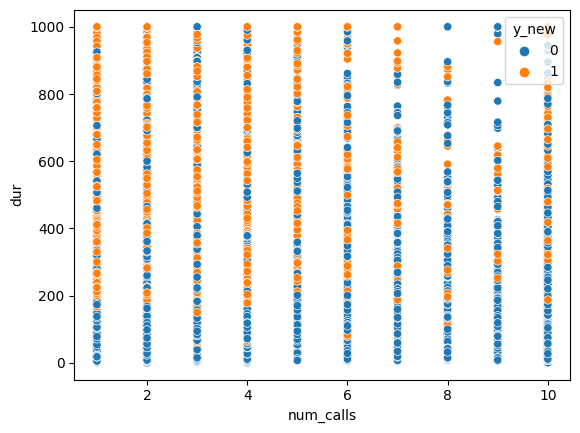

In [ ]:

import seaborn as sns
sns.scatterplot(x="num_calls", y="dur", hue='y_new', data=data)

<Axes: xlabel='prev_outcome', ylabel='education_qual'>

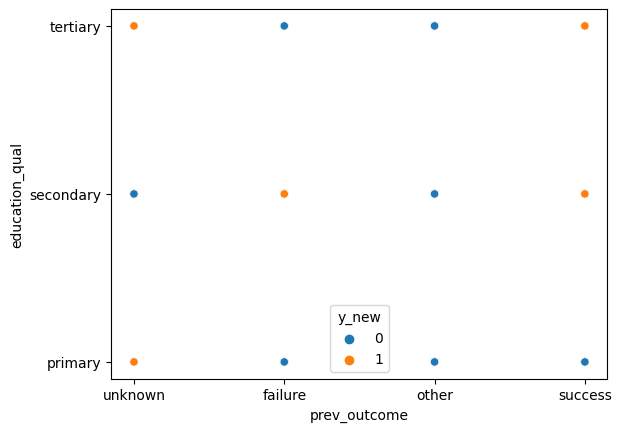

In [ ]:

sns.scatterplot(x="prev_outcome", y="education_qual", hue='y_new', data=data)

In [ ]:

data = data.drop(['y'], axis = 1)
data.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married      secondary   unknown    5  may   92   
4   33   blue-collar   single      secondary   unknown    5  may  198   

   num_calls prev_outcome  y_new age_bin  
0          1      unknown      0       7  
1          1      unknown      0       5  
2          1      unknown      0       2  
3          1      unknown      0       5  
4          1      unknown      0       2

In [ ]:
cleaned_data = data.copy(deep=True)

In [ ]:

# data_OHE = pd.get_dummies(data, columns = ['job', 'marital','education_qual','call_type','mon','prev_outcome'])
# data_OHE.head()

In [ ]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)
data.head()

age  job  marital  education_qual  call_type  day  mon  dur  num_calls  \
0   40    4        1               2          2    4    8  261          0   
1   26    9        2               1          2    4    8  151          0   
2   15    2        1               1          2    4    8   76          0   
3   29    1        1               1          2    4    8   92          0   
4   15    1        2               1          2    4    8  198          0   

   prev_outcome  y_new  age_bin  
0             3      0        7  
1             3      0        5  
2             3      0        2  
3             3      0        5  
4             3      0        2

In [ ]:

data.prev_outcome.value_counts()

3    36953
0     4901
1     1840
2     1511
Name: prev_outcome, dtype: int64

In [ ]:


data.marital.value_counts()

1    27210
2    12788
0     5207
Name: marital, dtype: int64

In [ ]:
data.education_qual.value_counts()

1    25056
2    13299
0     6850
Name: education_qual, dtype: int64

In [ ]:

data.call_type.value_counts()

0    29282
2    13017
1     2906
Name: call_type, dtype: int64

In [ ]:


data.mon.value_counts()

8     13765
5      6894
1      6245
6      5339
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: mon, dtype: int64

In [ ]:

data.prev_outcome.value_counts()

3    36953
0     4901
1     1840
2     1511
Name: prev_outcome, dtype: int64

In [ ]:

data.job.value_counts()

1     10018
4      9457
9      7596
0      5170
7      4153
5      2264
6      1579
2      1487
10     1303
3      1240
8       938
Name: job, dtype: int64

In [ ]:

# cleaned_data = pd.get_dummies(data, columns = ['job','marital','education_qual','prev_outcome'])
# cleaned_data.head(1)

**Final Cleaned Data** **bold text**

In [ ]:

data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y_new             0
age_bin           0
dtype: int64

In [ ]:

data.dtypes


age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
y_new             int64
age_bin           int64
dtype: object

In [ ]:

data.shape

(45205, 12)

In [ ]:
data.describe()

age           job       marital  education_qual     call_type  \
count  45205.000000  45205.000000  45205.000000    45205.000000  45205.000000   
mean      22.874439      4.276142      1.167703        1.142661      0.640195   
std       10.410718      3.239530      0.608243        0.652213      0.897927   
min        0.000000      0.000000      0.000000        0.000000      0.000000   
25%       15.000000      1.000000      1.000000        1.000000      0.000000   
50%       21.000000      4.000000      1.000000        1.000000      0.000000   
75%       30.000000      7.000000      2.000000        2.000000      2.000000   
max       53.000000     10.000000      2.000000        2.000000      2.000000   

               day           mon           dur     num_calls  prev_outcome  \
count  45205.00000  45205.000000  45205.000000  45205.000000  45205.000000   
mean      14.80688      5.523150    250.034200      1.583453      2.559916   
std        8.32234      3.006935    218.371516      2.133147      0.989112   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        7.00000      3.000000    103.000000      0.000000      3.000000   
50%       15.00000      6.000000    180.000000      1.000000      3.000000   
75%       20.00000      8.000000    319.000000      2.000000      3.000000   
max       30.00000     11.000000    998.000000      9.000000      3.000000   

              y_new       age_bin  
count  45205.000000  45205.000000  
mean       0.117000      3.977768  
std        0.321424      2.105739  
min        0.000000      0.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      5.000000  
max        1.000000     10.000000

**Correlation**

In [ ]:
data.corr()

age       job   marital  education_qual  call_type  \
age             1.000000 -0.036122 -0.407060       -0.163231   0.027342   
job            -0.036122  1.000000  0.062372        0.184024  -0.089219   
marital        -0.407060  0.062372  1.000000        0.119195  -0.039221   
education_qual -0.163231  0.184024  0.119195        1.000000  -0.153952   
call_type       0.027342 -0.089219 -0.039221       -0.153952   1.000000   
day            -0.008921  0.025787 -0.005183        0.026000  -0.027990   
mon            -0.043240 -0.090898 -0.006955       -0.074965   0.361111   
dur            -0.010368  0.004666  0.013160        0.001309  -0.027133   
num_calls       0.018924  0.004833 -0.017104        0.003265   0.012541   
prev_outcome    0.008931  0.007564 -0.016868       -0.027361   0.272219   
y_new           0.019450  0.040780  0.045603        0.068640  -0.148391   
age_bin         0.991207 -0.036569 -0.404085       -0.162132   0.027745   

                     day       mon       dur  num_calls  prev_outcome  \
age            -0.008921 -0.043240 -0.010368   0.018924      0.008931   
job             0.025787 -0.090898  0.004666   0.004833      0.007564   
marital        -0.005183 -0.006955  0.013160  -0.017104     -0.016868   
education_qual  0.026000 -0.074965  0.001309   0.003265     -0.027361   
call_type      -0.027990  0.361111 -0.027133   0.012541      0.272219   
day             1.000000 -0.006116 -0.034150   0.165153      0.083492   
mon            -0.006116  1.000000  0.006318  -0.132399     -0.033020   
dur            -0.034150  0.006318  1.000000  -0.092120      0.007923   
num_calls       0.165153 -0.132399 -0.092120   1.000000      0.111130   
prev_outcome    0.083492 -0.033020  0.007923   0.111130      1.000000   
y_new          -0.028371 -0.024490  0.410890  -0.082206     -0.077821   
age_bin        -0.008993 -0.042681 -0.009973   0.018426      0.010268   

                   y_new   age_bin  
age             0.019450  0.991207  
job             0.040780 -0.036569  
marital         0.045603 -0.404085  
education_qual  0.068640 -0.162132  
call_type      -0.148391  0.027745  
day            -0.028371 -0.008993  
mon            -0.024490 -0.042681  
dur             0.410890 -0.009973  
num_calls      -0.082206  0.018426  
prev_outcome   -0.077821  0.010268  
y_new           1.000000  0.019859  
age_bin         0.019859  1.000000

Text(0.5, 1.0, 'Correlation Matrix')

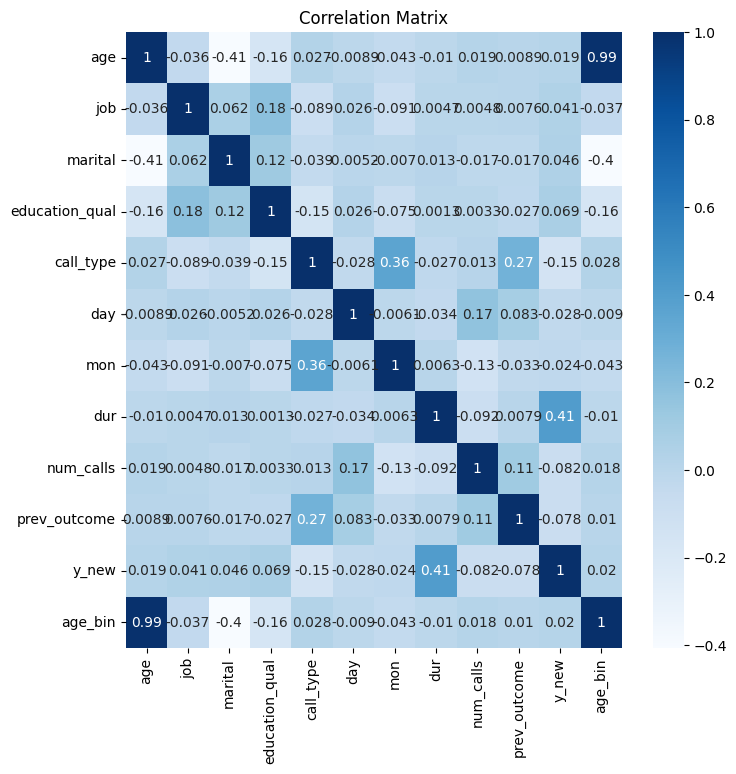

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,8))
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), cmap='Blues', annot = True)
plt.title('Correlation Matrix')

**Sampling**

In [ ]:

data.y_new.value_counts()

0    39916
1     5289
Name: y_new, dtype: int64

In [ ]:

X = data.drop(['y_new'], axis = 1)
Y = data['y_new']

In [ ]:

# X_OHE = data_OHE.drop(['y_new'],axis = 1)
# Y_OHE = data_OHE['y_new']

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 7)
#X_train_OHE, X_test_OHE, Y_train_OHE,Y_test_OHE = train_test_split(X_OHE,Y_OHE, test_size = 0.20, random_state = 7)

In [ ]:

X_train.describe()

age           job       marital  education_qual     call_type  \
count  36164.000000  36164.000000  36164.000000    36164.000000  36164.000000   
mean      22.845786      4.276103      1.167874        1.140997      0.640858   
std       10.387936      3.242352      0.606991        0.651767      0.898238   
min        0.000000      0.000000      0.000000        0.000000      0.000000   
25%       15.000000      1.000000      1.000000        1.000000      0.000000   
50%       21.000000      4.000000      1.000000        1.000000      0.000000   
75%       30.000000      7.000000      2.000000        2.000000      2.000000   
max       53.000000     10.000000      2.000000        2.000000      2.000000   

                day           mon           dur     num_calls  prev_outcome  \
count  36164.000000  36164.000000  36164.000000  36164.000000  36164.000000   
mean      14.770628      5.524555    250.208273      1.576402      2.559147   
std        8.299802      3.010546    218.182811      2.120854      0.989848   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.000000      3.000000    103.000000      0.000000      3.000000   
50%       15.000000      6.000000    180.000000      1.000000      3.000000   
75%       20.000000      8.000000    319.000000      2.000000      3.000000   
max       30.000000     11.000000    998.000000      9.000000      3.000000   

            age_bin  
count  36164.000000  
mean       3.972569  
std        2.101435  
min        0.000000  
25%        2.000000  
50%        4.000000  
75%        5.000000  
max       10.000000

In [ ]:
X_train.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
age_bin           int64
dtype: object

In [ ]:
Y_train.unique()

array([0, 1])

**Sampling [ to balance imbalanced data]**

In [ ]:
import imblearn
from imblearn.combine import SMOTEENN    # SMOTE + Edited NearestNeighbors
combo = SMOTEENN(sampling_strategy = 'all',random_state = 42)
X_combo,Y_combo = combo.fit_resample(X_train,Y_train)
#X_combo_OHE,Y_combo_OHE = combo.fit_resample(X_train_OHE,Y_train_OHE)

In [ ]:
X_combo.shape , Y_combo.shape


((52853, 11), (52853,))

In [ ]:
Y_combo.value_counts()

1    30217
0    22636
Name: y_new, dtype: int64

In [ ]:
X_combo.head()


age  job  marital  education_qual  call_type  day  mon  dur  num_calls  \
0   22    0        1               1          2   15    8   75          0   
1   29    4        1               2          2   19    6   92          2   
2   17    7        1               1          0   30    5    5          2   
3   19    7        2               1          0   14    8  102          0   
4    8    0        2               1          2   18    8  128          2   

   prev_outcome  age_bin  
0             3        4  
1             3        5  
2             3        3  
3             0        3  
4             3        1

In [ ]:
# #Cluster Centroid Under Sampling:
# from imblearn.under_sampling import ClusterCentroids
# ClustercentroidUS = ClusterCentroids(sampling_strategy = {0 : 20})
# X_sample, Y_sample = ClustercentroidUS.fit_resample(X_train, Y_train)

# #SMOTE Over sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'all')
X_smote , Y_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
X_smote.shape, Y_smote.shape

((63812, 11), (63812,))

In [ ]:
Y_smote.value_counts()

0    31906
1    31906
Name: y_new, dtype: int64

### `**Scaling**`

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train_scaled, Y_smote)

LogisticRegression()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
LR_predict = LR_model.predict(X_test_scaled)
LR_predict_proba = LR_model.predict_proba(X_test_scaled)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
print('Logistic Regression AUROC : ',roc_auc_score(Y_test, LR_predict_proba[:,1]))

Logistic Regression AUROC :  0.815407147467218


In [ ]:
accuracy_score(Y_test,LR_predict)

0.7818825351177967

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test, LR_predict)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[6404, 1606],
       [ 366,  665]])

**Model Building with KNN classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train_scaled , Y_smote)
#knnclassifier.score(X_test_scaled , Y_test_OHE)

KNN_proba = knnclassifier.predict_proba(X_test_scaled)
KNN_auroc = roc_auc_score(Y_test , KNN_proba[:,1])
print(f'KNN Test AUROC : {(KNN_auroc*100):.2f}%')

KNN Test AUROC : 83.82%


In [ ]:
KNN_predict = knnclassifier.predict(X_test_scaled)
accuracy_score(Y_test,KNN_predict)

0.8478044464107952

In [ ]:
knnclassifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
grid_params = { 'n_neighbors' : [4,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
               }
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_smote, Y_smote)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

In [ ]:
g_res.best_score_


0.916630163750305

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors = 4, metric = 'manhattan',weights = 'distance')
knn_tuned.fit(X_train_scaled , Y_smote)

Y_predict_proba_knn = knn_tuned.predict_proba(X_test_scaled)
Y_predict_val_knn = knn_tuned.predict(X_test_scaled)

Y_predict_knn = Y_predict_proba_knn[:,1]
KNN_auroc = roc_auc_score(Y_test , Y_predict_knn)
print(f'KNN Classifier AUROC : {(KNN_auroc*100):.2f}%')

KNN Classifier AUROC : 83.22%


In [ ]:
accuracy_score(Y_test,Y_predict_val_knn)

0.8599712421192346

In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_val_knn)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7174,  836],
       [ 430,  601]])

**Model Bulding - Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model_scaled = DecisionTreeClassifier()
DT_model_scaled.fit(X_smote,Y_smote)

DT_predict_proba = DT_model_scaled.predict_proba(X_test)
DT_predict = DT_predict_proba[:,1]

DT_auroc_scaled = roc_auc_score(Y_test , DT_predict)
print(f'Decision Tree AUROC : {(DT_auroc_scaled*100):.2f}%')

# CV_score = np.mean(cross_val_score(DT_model , X_combo,Y_combo, cv=10))
# print(f'Decision Tree CV-score : {(CV_score*100):.2f}%')

Decision Tree AUROC : 73.38%


**Trying Hyper Parameter Tuning***

In [ ]:
param_dict = {"criterion" : ['gini','entropy'], 'max_depth' : [1,2,3,4,5,6,7,8,9,10,12,15,20]}

grid = GridSearchCV(DT_model_scaled, param_grid = param_dict, cv = 10, n_jobs = -1)

In [ ]:
grid.fit(X_train_scaled,Y_smote)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15,
                                       20]})

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
grid.best_score_

0.9052860455998646

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 20}

**Constructing the model with the best values of hyper parameters**

In [ ]:
DT_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)
DT_model.fit(X_smote,Y_smote)

Y_predict_proba = DT_model.predict_proba(X_test)
Y_predict_val_ws = DT_model.predict(X_test)

Y_predict_DT = Y_predict_proba[:,1]
DT_auroc = roc_auc_score(Y_test , Y_predict_DT)
print(f'Decision Tree AUROC : {(DT_auroc*100):.2f}%')

Decision Tree AUROC : 85.57%


In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_val_ws)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7151,  859],
       [ 401,  630]])

In [ ]:
accuracy_score(Y_test, Y_predict_val_ws)

0.8606348855215131

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



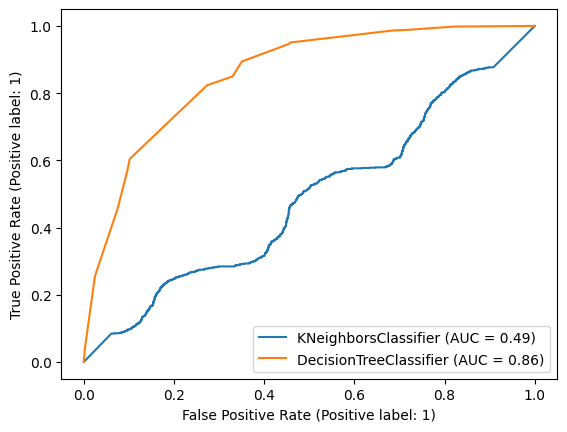

In [ ]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn_tuned, X_test, Y_test)
dt_disp = RocCurveDisplay.from_estimator(DT_model, X_test, Y_test, ax=knn_disp.ax_)

In [ ]:
# plt.figure()
# plt.plot(accuracy_df['Max Depth'], accuracy_df['Training Accuracy'])
# plt.plot(accuracy_df['Max Depth'], accuracy_df['Validation Accuracy'])
# plt.title('Training Vs Validation Accuracy')
# plt.xticks(range(0,21,2))
# plt.xlabel('max_depth')
# plt.ylabel('Accuracy')
# plt.legend(['Training Accuracy', 'Validation Accuracy'])

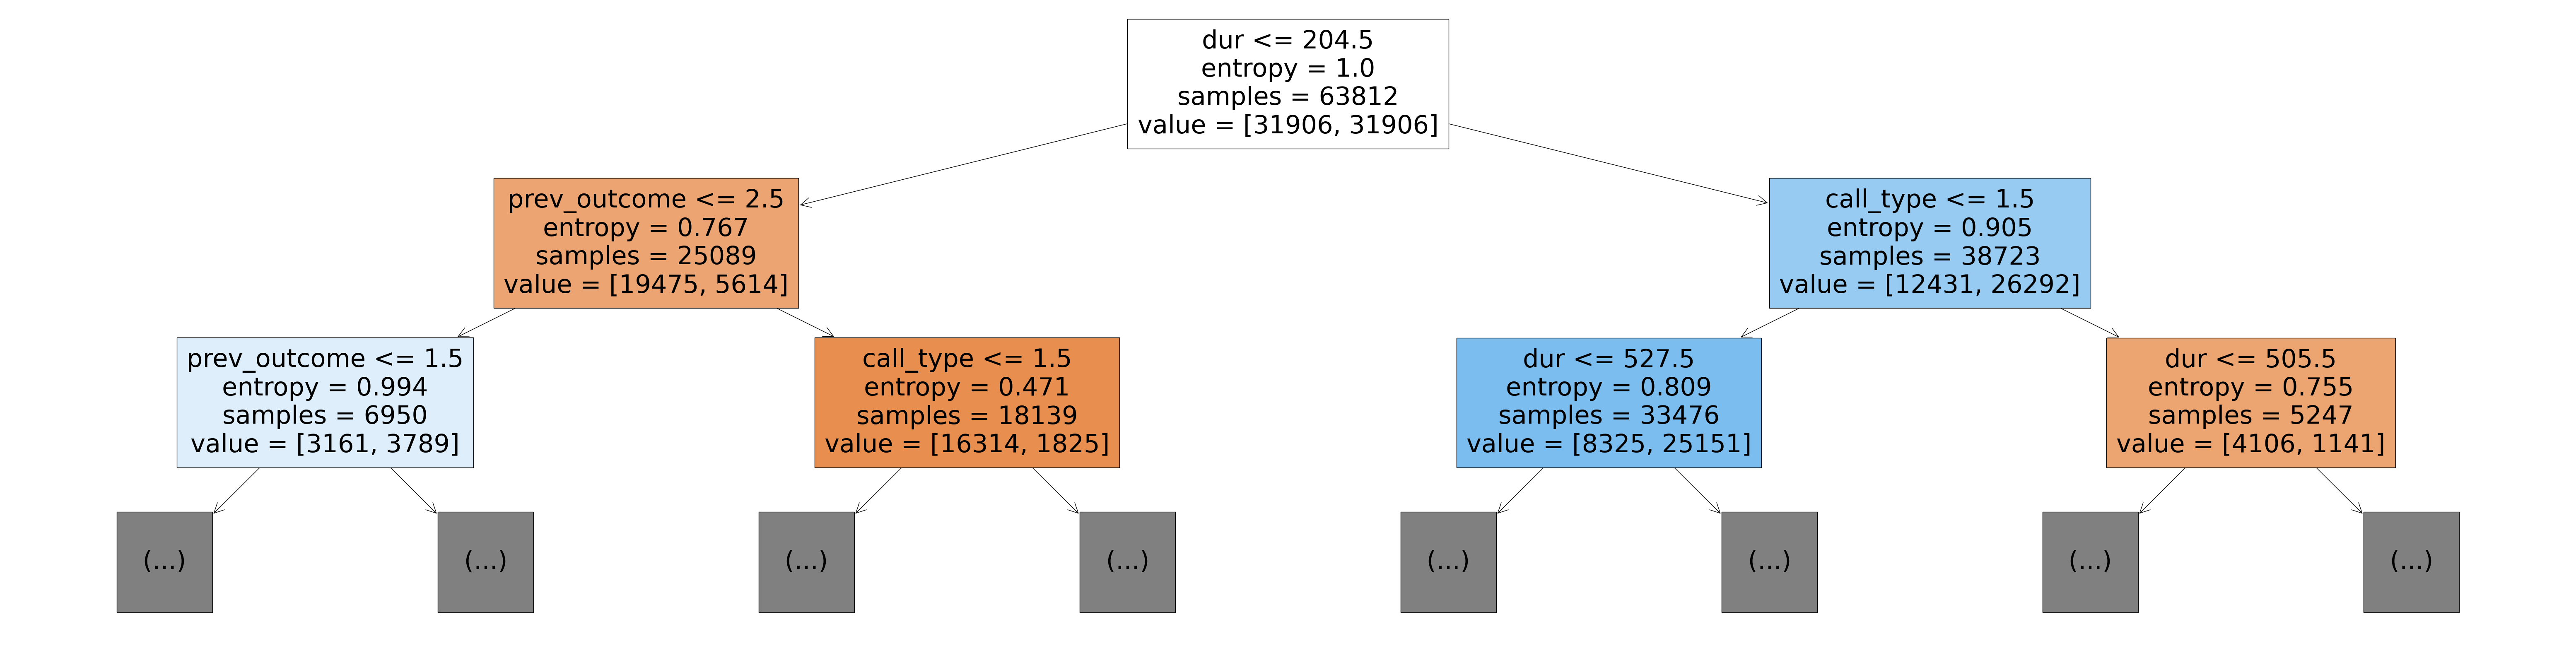

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(DT_model, feature_names=X_smote.columns, max_depth=2, filled=True);

In [ ]:
X_columns = X_test.columns
feature_importance = DT_model.feature_importances_
feat_imp_format = list(zip(feature_importance , X_columns))
feat_imp_sorted = sorted(feat_imp_format,key = lambda x : x[0], reverse = True)
feat_imp_sorted

[(0.5085255755754754, 'dur'),
 (0.2862898688908147, 'prev_outcome'),
 (0.17843776915784326, 'call_type'),
 (0.022779688297203313, 'num_calls'),
 (0.003967098078663212, 'mon'),
 (0.0, 'age'),
 (0.0, 'job'),
 (0.0, 'marital'),
 (0.0, 'education_qual'),
 (0.0, 'day'),
 (0.0, 'age_bin')]

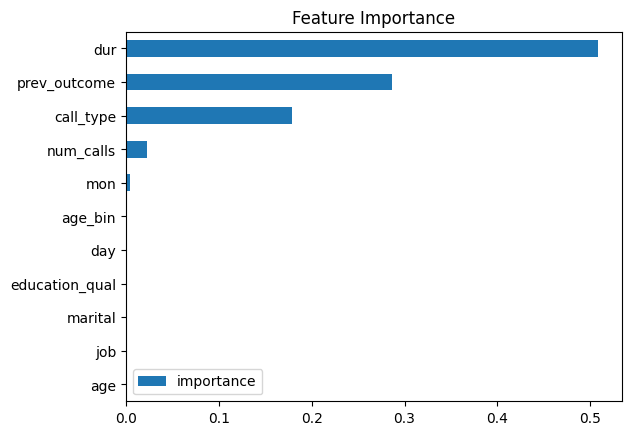

In [ ]:
import matplotlib.pyplot as plt
plot_data = pd.DataFrame(feature_importance , index = X_test.columns , columns=['importance'])
plot_data.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

**Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=7)
model2 = DecisionTreeClassifier(random_state=7)
model3 = KNeighborsClassifier(5)

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft')

model.fit(X_train_scaled,Y_smote)

Y_predict_voting = model.predict(X_test_scaled)

roc_auc_score(Y_test,model.predict_proba(X_test_scaled)[:,1])

0.882095126000356

In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_voting )
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7193,  817],
       [ 381,  650]])

In [ ]:
accuracy_score(Y_test,Y_predict_voting )

0.8674925340117243

**BootStrap Aggregation - Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(DecisionTreeClassifier(max_depth = 12, random_state=7), n_estimators=100)
bagging_model.fit(X_smote, Y_smote)
Y_predict_bag = bagging_model.predict_proba(X_test)
Y_predict_bag_val = Y_predict_bag[:,1]
roc_auc_score(Y_test,Y_predict_bag_val)

0.9071428657921536

In [ ]:
Y_predict_bag_con = bagging_model.predict(X_test)
confusion_mat = confusion_matrix(Y_test, Y_predict_bag_con)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7174,  836],
       [ 315,  716]])

In [ ]:
accuracy_score(Y_test, Y_predict_bag_con)

0.8726910739962394

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



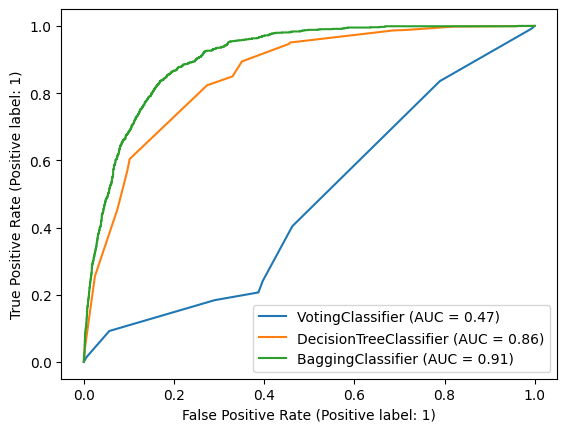

In [ ]:
#from sklearn.metrics import RocCurveDisplay
voting_disp = RocCurveDisplay.from_estimator(model, X_test, Y_test)
dt_model = RocCurveDisplay.from_estimator(DT_model,X_test,Y_test,ax = voting_disp.ax_)
bag_disp = RocCurveDisplay.from_estimator(bagging_model, X_test, Y_test, ax=voting_disp.ax_)

**Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from pprint import pprint

RFA_model = RandomForestClassifier() #max_features='sqrt',n_estimators= 100, max_depth = 6
RFA_model.fit(X_smote,Y_smote)

Y_RFA_proba = RFA_model.predict_proba(X_test)
roc_auc_score(Y_test,Y_RFA_proba[:,1])

0.9151210114418082

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
param_grid = {
    'max_depth': [3, 4, 20, 30],  #log2(#features)
    'n_estimators': [150, 300]
}
RFA_GCV_model = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFA_GCV_model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_smote,Y_smote)
grid_search.best_params_


Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'max_depth': 30, 'n_estimators': 300}

In [ ]:
RFA_model_tuned = RandomForestClassifier(bootstrap = True,max_features='sqrt',random_state = 42,n_estimators= 150)
RFA_model_tuned.fit(X_smote,Y_smote)

Y_predict_RFA_proba = RFA_model_tuned.predict_proba(X_test)
Y_predict_RFA = Y_predict_RFA_proba[:,1]

Y_predict_RFA_val = RFA_model_tuned.predict(X_test)

RFA_auroc = roc_auc_score(Y_test , Y_predict_RFA)
print(f'RandomForest AUROC : {(RFA_auroc*100):.2f}%')

RandomForest AUROC : 91.71%


In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_RFA_val)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7355,  655],
       [ 356,  675]])

In [ ]:
accuracy_score(Y_test,Y_predict_RFA_val)

0.8881760867160712

In [ ]:
# Pull out one tree from the forest
tree = RFA_model_tuned.estimators_[90]
tree

DecisionTreeClassifier(max_features='sqrt', random_state=698027879)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
#print('The depth of this tree is:', tree.tree_.max_depth)

In [ ]:
feature_importance_RFA = RFA_model_tuned.feature_importances_
feature_imp_RFA_formated = list(zip(feature_importance_RFA,X_test.columns))
feature_imp_RFA_sorted = sorted(feature_imp_RFA_formated, key = lambda x: x [0] , reverse = True)
feature_imp_RFA_sorted

[(0.3590925777241324, 'dur'),
 (0.14691210584372386, 'prev_outcome'),
 (0.08648611884661042, 'mon'),
 (0.08471343224648448, 'day'),
 (0.0792851478601521, 'call_type'),
 (0.0711716069522324, 'age'),
 (0.048772650335948006, 'job'),
 (0.045099963026827415, 'num_calls'),
 (0.039057999371905516, 'age_bin'),
 (0.019756620576933493, 'marital'),
 (0.01965177721505003, 'education_qual')]

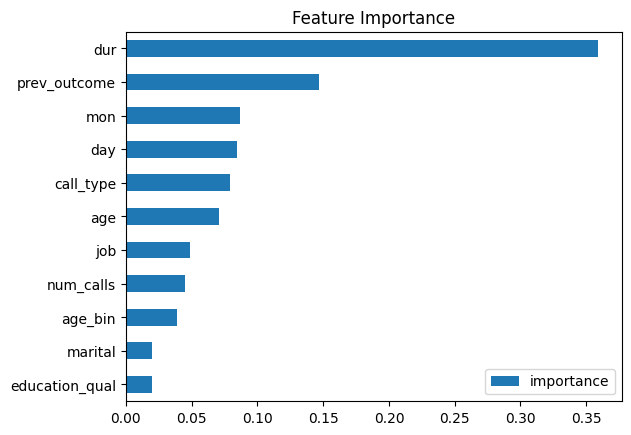

In [ ]:
plot_data = pd.DataFrame(feature_importance_RFA , index = X_test.columns , columns=['importance'])
plot_data.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

**Using XGBoost ML Algorithm**

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_smote,Y_smote)
  print("Learning rate : ", lr, " Train score : ", model.score(X_smote,Y_smote), " Cross-Val score : ", np.mean(cross_val_score(model,X_smote, Y_smote, cv=10)))

Learning rate :  0.01  Train score :  0.8587099605089952  Cross-Val score :  0.8561725401980013
Learning rate :  0.02  Train score :  0.8708706826302263  Cross-Val score :  0.8665154666556264
Learning rate :  0.03  Train score :  0.8828433523475209  Cross-Val score :  0.8769054690773214
Learning rate :  0.04  Train score :  0.8942361938193443  Cross-Val score :  0.8878282910656445
Learning rate :  0.05  Train score :  0.9020403685827117  Cross-Val score :  0.8949430209189563
Learning rate :  0.06  Train score :  0.9077289538017927  Cross-Val score :  0.8996914069999118
Learning rate :  0.07  Train score :  0.9131981445496145  Cross-Val score :  0.903718959416644
Learning rate :  0.08  Train score :  0.9176643891431079  Cross-Val score :  0.9067591321010339
Learning rate :  0.09  Train score :  0.9213157399862095  Cross-Val score :  0.9078875580125126
Learning rate :  0.1  Train score :  0.9224753964771516  Cross-Val score :  0.9102226299470709
Learning rate :  0.11  Train score :  0.92

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score
model = xgb.XGBClassifier(learning_rate = 0.1)
model.fit(X_smote,Y_smote)
print(" Train score : ", model.score(X_smote,Y_smote), " Cross-Val score : ", np.mean(cross_val_score(model,X_smote, Y_smote, cv=10)))

 Train score :  0.9224753964771516  Cross-Val score :  0.9102226299470709


In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.1)  #n_estimators = 300,gamma = ,learning_rate = 0.1

xgb_model.fit(X_smote, Y_smote)

Y_predict_XGB_proba = xgb_model.predict_proba(X_test)
Y_predict_XGB = Y_predict_XGB_proba[:,1]

Y_predict_XGB = xgb_model.predict(X_test)

XGB_auroc = roc_auc_score(Y_test , Y_predict_XGB)
print(f'XGB AUROC : {(XGB_auroc*100):.2f}%')


XGB AUROC : 81.90%


In [ ]:
Y_predict_XGB_val = model.predict(X_test)
accuracy_score(Y_test, Y_predict_XGB_val)

0.8799911514213029

In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_XGB_val)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7193,  817],
       [ 268,  763]])

In [ ]:
from sklearn.model_selection import cross_validate
cv_results_model = cross_validate(xgb_model, X_smote, Y_smote, cv= 10,scoring=('roc_auc'),return_estimator = True)
cv_results_model

{'fit_time': array([8.48028445, 4.32325268, 7.2116816 , 4.30631232, 4.28022861,
        7.24875712, 4.28918839, 7.26156473, 4.29580069, 6.44067669]),
 'score_time': array([0.02446842, 0.02044153, 0.01975012, 0.02904034, 0.01989412,
        0.02039075, 0.01983547, 0.01989794, 0.02023268, 0.05770516]),
 'estimator': [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_job

In [ ]:
model_validated = cv_results_model['estimator'][8]
model_validated

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
XGB_Model_final = model_validated.fit(X_smote,Y_smote)
Y_predict_XGB_proba = XGB_Model_final.predict_proba(X_test)
Y_predict_XGB = Y_predict_XGB_proba[:,1]

Y_predict_val = XGB_Model_final.predict(X_test)

XGB_auroc = roc_auc_score(Y_test , Y_predict_XGB)
print(f'Validated XGB AUROC : {(XGB_auroc*100):.2f}%')

Validated XGB AUROC : 92.22%


In [ ]:
confusion_mat = confusion_matrix(Y_test, Y_predict_val)
confusion_mat  #[[TN,FP],[FN,TP]]

array([[7193,  817],
       [ 268,  763]])

In [ ]:
accuracy_score(Y_test, Y_predict_val)

0.8799911514213029

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
eval_set = [(X_test,Y_test)]
XGB_model_tuned = model_validated.fit(X_smote,Y_smote,early_stopping_rounds = 10, eval_metric = 'error',eval_set=eval_set, verbose=2)
# Y_predict_XGB = XGB_model_tuned.predict(X_test)
cv_results = cross_validate(XGB_model_tuned , X_smote, Y_smote, cv= 10,scoring=('roc_auc'),return_estimator = True)
cv_results

[0]	validation_0-error:0.18870
[2]	validation_0-error:0.15629
[4]	validation_0-error:0.16049
[6]	validation_0-error:0.15916
[8]	validation_0-error:0.15894
[10]	validation_0-error:0.16127
[11]	validation_0-error:0.16071


{'fit_time': array([4.36364698, 5.21418691, 6.11783671, 4.24224639, 7.20524764,
        4.30092406, 7.18332601, 4.30278444, 4.26882792, 7.17600489]),
 'score_time': array([0.02024293, 0.05056357, 0.02030134, 0.02042007, 0.02254701,
        0.02073646, 0.01975465, 0.02006173, 0.01977086, 0.02097416]),
 'estimator': [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_job

In [ ]:
XGB_model_validated = cv_results['estimator'][8]
XGB_model_validated

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
XGB_model_validated.fit(X_smote,Y_smote)
Y_predict_XGB_proba = XGB_model_validated.predict_proba(X_test)
Y_predict_XGB = Y_predict_XGB_proba[:,1]

Y_predict_val_XGB = XGB_model_validated.predict(X_test)

XGB_auroc = roc_auc_score(Y_test , Y_predict_XGB)
print(f'Validated XGB AUROC : {(XGB_auroc*100):.2f}%')

Validated XGB AUROC : 92.22%


In [ ]:
confusion_mat_XGB = confusion_matrix(Y_test, Y_predict_val_XGB)
confusion_mat_XGB  #[[TN,FP],[FN,TP]]

array([[7193,  817],
       [ 268,  763]])

In [ ]:
accuracy_score(Y_test, Y_predict_val_XGB)

0.8799911514213029

**Predicting the model with our values**

In [ ]:
## input_col = ['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']
# input_data = [32,8,2,2,0,20,8,500,3,2]
# input = pd.DataFrame(np.column_stack(input_data),columns = input_col)
# Y_predict_val = XGB_Model_final.predict(input)
# Y_predict_val

In [ ]:
# params = { 'max_depth':[4,8,12,15,30] }
# XGB_gridsearch = GridSearchCV(XGB_model_validated, params, n_jobs=-1, cv=3, scoring='roc_auc', verbose=2, refit=True)
# XGB_gridsearch.fit(X_train_scaled,Y_combo)
# XGB_gridsearch.best_params_

**Feature Importance**

In [ ]:
feature_importance_XGB = XGB_model_validated.feature_importances_
feature_importance_XGB_formated = list(zip(feature_importance_XGB,X_test.columns))
feature_importance_XGB_sorted = sorted(feature_importance_XGB_formated, key = lambda x : x[0], reverse = True)
feature_importance_XGB_sorted

[(0.31501126, 'prev_outcome'),
 (0.22826909, 'call_type'),
 (0.14682536, 'dur'),
 (0.06148546, 'num_calls'),
 (0.04740426, 'mon'),
 (0.038640294, 'marital'),
 (0.037788436, 'job'),
 (0.036319, 'age_bin'),
 (0.03287065, 'day'),
 (0.028955974, 'education_qual'),
 (0.026430216, 'age')]

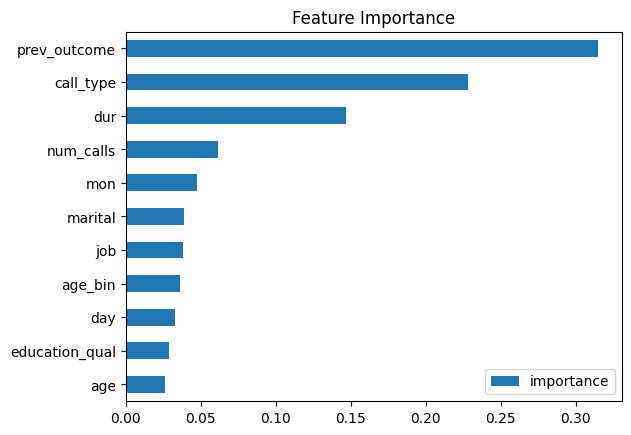

In [ ]:
plot_data = pd.DataFrame(feature_importance_XGB , index = X_test.columns , columns=['importance'])
plot_data.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

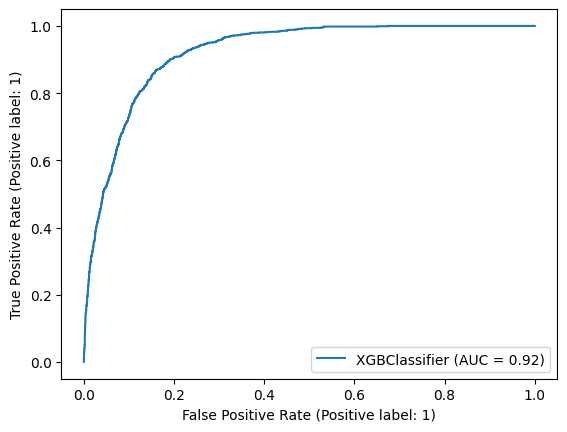

In [ ]:
xgb_disp = RocCurveDisplay.from_estimator(XGB_model_validated, X_test, Y_test)

**Building model with 4 important features**

In [ ]:
X_imp = X_smote[['call_type','prev_outcome','dur','mon']]
Y_imp = Y_smote
X_test_imp = X_test[['call_type','prev_outcome','dur','mon']]
X_imp.head()

call_type  prev_outcome  dur  mon
0          2             3   75    8
1          2             3   92    6
2          0             3    5    5
3          0             0  235    3
4          0             0  102    8

In [ ]:
XGB_model_validated.fit(X_imp,Y_imp)
Y_predict_XGB_imp_proba = XGB_model_validated.predict_proba(X_test_imp)
Y_predict_XGB_imp = Y_predict_XGB_imp_proba[:,1]
XGB_auroc_imp = roc_auc_score(Y_test , Y_predict_XGB_imp)
print(f'XGB AUROC with Imp features : {(XGB_auroc_imp*100):.2f}%')

XGB AUROC with Imp features : 90.69%


**PCA - Dimensionality Reduction**

In [ ]:
from sklearn.decomposition import PCA
for count in [2,4,6,8,9]:
  pca = PCA(n_components = count)
  pca.fit(X_train_scaled , X_test_scaled)
  print(sum(pca.explained_variance_ratio_))

0.35312009837721847
0.5727990647202363
0.746020824127964
0.8901940412235344
0.9496855289631705


In [ ]:
# pca = PCA(n_components=2)
# PCA_columns = pca.fit_transform(X_smote)
# PCA_data = pd.DataFrame(data = PCA_columns, columns = ['Column 1', 'Column 2'])
# PCA_combined = pd.concat([PCA_data, data[['y_new']]], axis = 1)

**Pickling**

In [ ]:
import pickle

In [ ]:
pickle_out = open('trained_model.pkl', 'wb')
pickle.dump(XGB_Model_final,pickle_out)
pickle_out.close()

In [ ]:
loaded_model = pickle.load(open('trained_model.pkl','rb'))

In [1]:
# loaded_model.predict(input)


**Light Weight Gradient Boosting**

In [ ]:
from lightgbm import LGBMClassifier
LGBM_model = LGBMClassifier()
LGBM_model.fit(X_smote,Y_smote)

Y_predict_LGBM = LGBM_model.predict_proba(X_test)
Y_predict_LGBM_val = LGBM_model.predict(X_test)

roc_auc_score(Y_test,Y_predict_LGBM[:,1])

0.9254566006846436

In [ ]:
accuracy_score(Y_test,Y_predict_LGBM_val)

0.8827563322641301

In [ ]:
confusion_mat_LGBM = confusion_matrix(Y_test, Y_predict_LGBM_val)
confusion_mat_LGBM  #[[TN,FP],[FN,TP]]

array([[7201,  809],
       [ 251,  780]])

In [ ]:
parameters = {
    "learning_rate" :[0.001,0.1,0.2,0.3,0.5,0.7,1],
    "max_depth" : [3,5,7],
    "subsample" :[0.6,0.8,1]
}

grid = GridSearchCV(LGBM_model,param_grid = parameters,cv = 10, n_jobs = -1)
grid.fit(X_combo,Y_combo)
print(grid.best_params_)

{'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.6}


In [ ]:
LGBM_model_tuned = LGBMClassifier(learning_rate = 0.1,max_bin = 20,num_leaves = 40,min_gain_to_split =1)
LGBM_model_tuned.fit(X_smote,Y_smote)

LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
Y_predict_LGBM = LGBM_model_tuned.predict_proba(X_test)
Y_predict_LGBM_val = LGBM_model_tuned.predict(X_test)

roc_auc_score(Y_test,Y_predict_LGBM[:,1])

0.9254635633682922

In [ ]:
params = {
    'num_leaves': [20, 30,40, ],
     }

LGBM_gridsearch = GridSearchCV(LGBM_model_tuned, params, n_jobs=-1, cv=3, scoring='roc_auc', verbose=2, refit=True)
LGBM_gridsearch.fit(X_combo,Y_combo)
LGBM_gridsearch.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1


{'num_leaves': 40}

In [ ]:
cv_results_model = cross_validate(LGBM_model_tuned, X_smote, Y_smote, cv= 10,scoring=('roc_auc'),return_estimator = True)
cv_results_model

[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
[LightGBM] [Warning] min_gain_to_split i

{'fit_time': array([6.02878714, 0.64138627, 0.64614034, 0.62806678, 0.64163208,
        0.60769415, 0.64690733, 0.63035011, 0.60939097, 0.64423633]),
 'score_time': array([0.04022408, 0.04278803, 0.04475498, 0.0424962 , 0.0385921 ,
        0.03824949, 0.03882098, 0.03939676, 0.03818107, 0.04744554]),
 'estimator': [LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40),
  LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40)],
 'test_score': array([0.

In [ ]:
LGBM_model_validated = cv_results_model['estimator'][8]
LGBM_model_validated

LGBMClassifier(max_bin=20, min_gain_to_split=1, num_leaves=40)

In [ ]:
LGBM_model_validated.fit(X_smote,Y_smote)

Y_predict_LGBM = LGBM_model_validated.predict_proba(X_test)
Y_predict_LGBM_val = LGBM_model_validated.predict(X_test)

roc_auc_score(Y_test,Y_predict_LGBM[:,1])

[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1


0.9254635633682922

In [ ]:
accuracy_score(Y_test,Y_predict_LGBM_val)

0.8836411901338348

In [ ]:
confusion_mat = confusion_matrix(Y_test,Y_predict_LGBM_val)
confusion_mat

array([[7204,  806],
       [ 246,  785]])

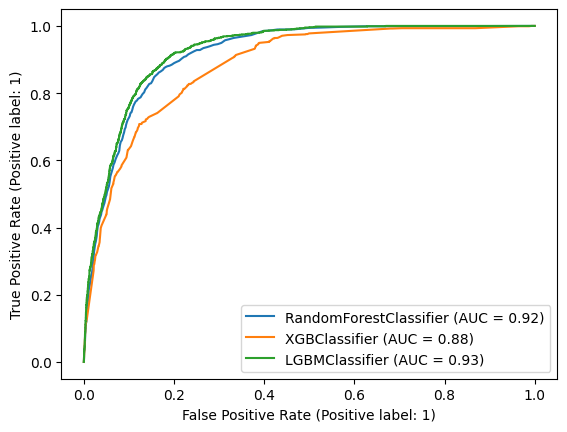

In [ ]:
#from sklearn.metrics import RocCurveDisplay
rfa_disp = RocCurveDisplay.from_estimator(RFA_model_tuned, X_test, Y_test)
xgboost_disp = RocCurveDisplay.from_estimator(XGB_Model_final , X_test, Y_test,ax=rfa_disp.ax_)
lgbm_disp = RocCurveDisplay.from_estimator(LGBM_model_validated, X_test, Y_test, ax=rfa_disp.ax_)

**AdaBoost Algorithm**


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
adaboost_model = AdaBoostClassifier(learning_rate=1)
adaboost_model.fit(X_smote,Y_smote)
Y_predict_ada = adaboost_model.predict_proba(X_test)
Y_predict_ada_val = adaboost_model.predict(X_test)

roc_auc_score(Y_test,Y_predict_ada[:,1])

0.8868634744881216

**CatBoost Algorithm**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier()
cat_model.fit(X_smote,Y_smote)

Learning rate set to 0.060761
0:	learn: 0.6397475	total: 88.1ms	remaining: 1m 27s
1:	learn: 0.5970387	total: 127ms	remaining: 1m 3s
2:	learn: 0.5608347	total: 164ms	remaining: 54.5s
3:	learn: 0.5321585	total: 201ms	remaining: 50.1s
4:	learn: 0.5081859	total: 237ms	remaining: 47.2s
5:	learn: 0.4898518	total: 276ms	remaining: 45.7s
6:	learn: 0.4723276	total: 318ms	remaining: 45.1s
7:	learn: 0.4595820	total: 355ms	remaining: 44s
8:	learn: 0.4455457	total: 391ms	remaining: 43.1s
9:	learn: 0.4351842	total: 422ms	remaining: 41.8s
10:	learn: 0.4252827	total: 456ms	remaining: 41s
11:	learn: 0.4165933	total: 498ms	remaining: 41s
12:	learn: 0.4093016	total: 537ms	remaining: 40.8s
13:	learn: 0.4027911	total: 572ms	remaining: 40.3s
14:	learn: 0.3965034	total: 614ms	remaining: 40.3s
15:	learn: 0.3908464	total: 656ms	remaining: 40.3s
16:	learn: 0.3854007	total: 677ms	remaining: 39.2s
17:	learn: 0.3809229	total: 705ms	remaining: 38.5s
18:	learn: 0.3766840	total: 741ms	remaining: 38.3s
19:	learn: 0.37

In [ ]:
Y_predict_cat = cat_model.predict_proba(X_test)
Y_predict_cat_val = cat_model.predict(X_test)
roc_auc_score(Y_test,Y_predict_cat[:,1])

0.9248544799117495

In [ ]:
accuracy_score(Y_test,Y_predict_cat_val)

0.89315341223316

In [ ]:
confusion_mat_cat = confusion_matrix(Y_test,Y_predict_cat_val)
confusion_mat_cat

array([[7352,  658],
       [ 308,  723]])

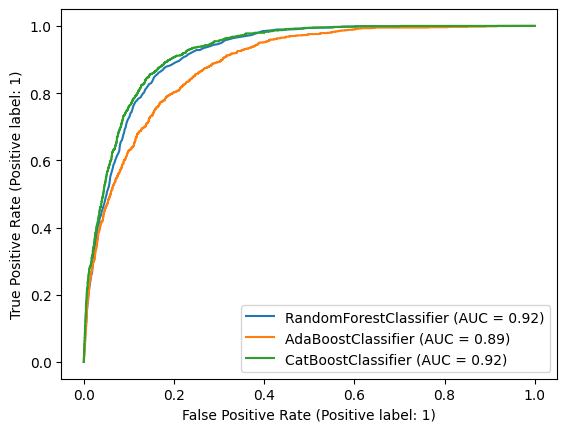

In [ ]:
rfa_disp = RocCurveDisplay.from_estimator(RFA_model_tuned, X_test, Y_test)
#xgboost_disp = RocCurveDisplay.from_estimator(XGB_Model_final , X_test, Y_test,ax=rfa_disp.ax_)
#lgbm_disp = RocCurveDisplay.from_estimator(LGBM_model_validated, X_test, Y_test, ax=rfa_disp.ax_)
ada_disp = RocCurveDisplay.from_estimator(adaboost_model, X_test, Y_test, ax = rfa_disp.ax_)
cat_disp = RocCurveDisplay.from_estimator(cat_model,X_test,Y_test,ax = rfa_disp.ax_)

**Navie Bayes Algorithm**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
gnb =  GaussianNB()
gnb.fit(X_smote,Y_smote)
Y_predict_gnb = gnb.predict_proba(X_test)
roc_auc_score(Y_test,Y_predict_gnb[:,1])

0.7948253335125468

In [ ]:
Y_predict_gnb = gnb.predict(X_test)
accuracy_score(Y_test,Y_predict_gnb)

0.6716071231058511

**Trying to predict the best threshold to improve accuracy**

In [ ]:
pred=[]
for model in [XGB_Model_final,cat_model,LGBM_model_validated,adaboost_model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(Y_test,final_prediction)))

Ensemble test roc-auc: 0.9270201772517622


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, final_prediction)
thresholds

array([1.78610094, 0.78610094, 0.78360989, ..., 0.21488988, 0.21488784,
       0.20722396])

In [ ]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(Y_test, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

thresholds  accuracy
208    0.695058  0.908196
207    0.695507  0.908085
223    0.689891  0.908085
206    0.695558  0.907975
224    0.689548  0.907975

In [ ]:
y_pred_threshold = (cat_model.predict_proba(X_test)[:,1] >= 0.658964).astype(bool)

In [ ]:
accuracy_score(Y_test,y_pred_threshold )

0.9043247428381816

In [ ]:
confusion_mat_threshold = confusion_matrix(Y_test,y_pred_threshold )
confusion_mat_threshold

array([[7593,  417],
       [ 448,  583]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

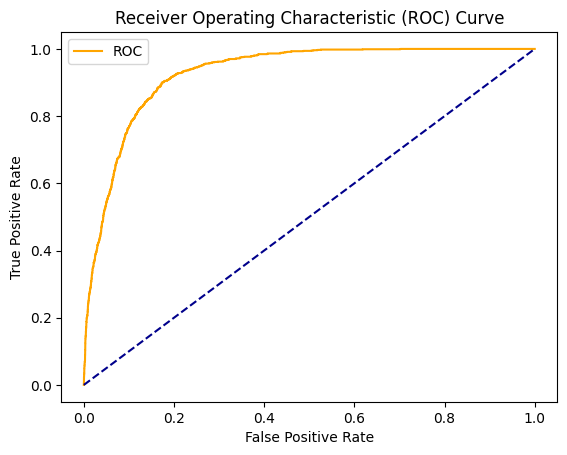

In [ ]:
plot_roc_curve(fpr,tpr)

**Feature Selection ( features that doesnt show big variance)**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
var_thres=VarianceThreshold(threshold=0.4)
var_thres.fit(data)

VarianceThreshold(threshold=0.4)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
var_thres.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True])

In [ ]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [ ]:
for feature in constant_columns:
     print(feature)

marital
y_new


In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = xgb.XGBClassifier(random_state=7,learning = 0.1)
model2 = CatBoostClassifier(random_state=7)
model3 =  LGBMClassifier(random_state = 7)

model = VotingClassifier(estimators=[('xgb', model1), ('cat', model2),('LGBM',model3)], voting='soft')

model.fit(X_smote,Y_smote)

Y_predict_voting = model.predict(X_test)

[15:50:34] WARNING: ../src/learner.cc:767: 
Parameters: { "learning" } are not used.

Learning rate set to 0.060761
0:	learn: 0.6451500	total: 23.4ms	remaining: 23.4s
1:	learn: 0.6026420	total: 39.8ms	remaining: 19.8s
2:	learn: 0.5674051	total: 58.7ms	remaining: 19.5s
3:	learn: 0.5375546	total: 76ms	remaining: 18.9s
4:	learn: 0.5118449	total: 94.2ms	remaining: 18.7s
5:	learn: 0.4901714	total: 112ms	remaining: 18.5s
6:	learn: 0.4724323	total: 129ms	remaining: 18.3s
7:	learn: 0.4579522	total: 147ms	remaining: 18.3s
8:	learn: 0.4451765	total: 165ms	remaining: 18.1s
9:	learn: 0.4346334	total: 182ms	remaining: 18s
10:	learn: 0.4267933	total: 203ms	remaining: 18.3s
11:	learn: 0.4176944	total: 222ms	remaining: 18.3s
12:	learn: 0.4093222	total: 240ms	remaining: 18.2s
13:	learn: 0.4033159	total: 257ms	remaining: 18.1s
14:	learn: 0.3977680	total: 275ms	remaining: 18.1s
15:	learn: 0.3920175	total: 292ms	remaining: 18s
16:	learn: 0.3870093	total: 310ms	remaining: 17.9s
17:	learn: 0.3827487	total: 

In [ ]:
roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])


0.9266542428172351

In [ ]:
accuracy_score(Y_test,Y_predict_voting)

0.8906094458577591

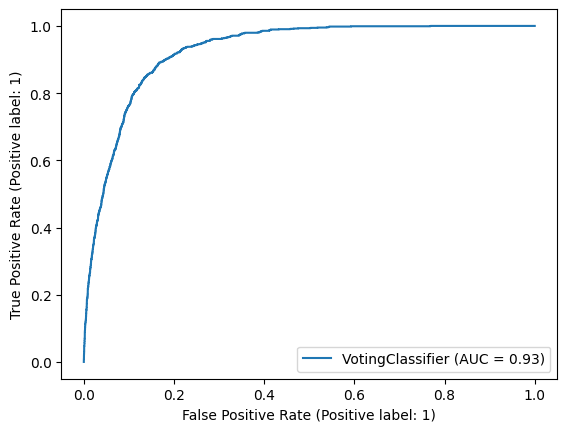

In [ ]:
vote_disp = RocCurveDisplay.from_estimator(model, X_test, Y_test)

**completed**